REGRESSIONE POLINOMIALE

 - https://www.developersmaggioli.it/blog/apprendimento-supervisionato-la-regressione-polinomiale-e-la-regolarizzazione/
 - https://github.com/ccasadei/corso-ia/blob/master/01Regressione/03RegressionePolinomiale/regressionePolinomiale01.ipynb 

In [1]:
# Importiamo le librerie di cui abbiamo bisogno

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# applichiamo uno stile piacevole alla vista e settiamo i parametri di visualizzazione
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

informazioni sul dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None 

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.06

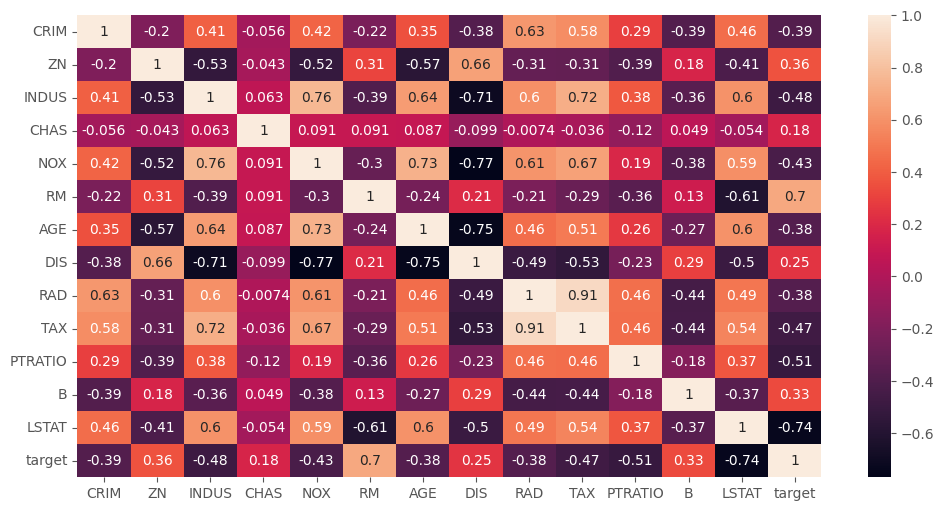

In [3]:
# importiamo il dataset
boston = pd.read_csv('boston.csv')

# Eliminiamo la colonna Unnamed: 0 che non ci serve
del boston['Unnamed: 0']

# Facciamo una piccola ispezione del dataset per vedere se ci sono valori nulli o mancanti
print('informazioni sul dataset', '\n')
print(boston.info(), '\n')
print(boston.describe(), '\n')
print('controlliamo se ci sono dei valori nulli', '\n')
print(boston.isnull().sum())
print('\n')
# Controlliamo se ci sono valori anomali nei dati
corr = boston.corr(method="pearson")
print('Controlliamo se ci sono valori anomali nei dati', '\n')
print(corr)
print('stampiamo una mappa semplice delle correlazioni', '\n')
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
# Testiamo il modello con il train test split e vediamo come si comporta
# dividiamo il dataset in train e test set con il metodo train_test_split di sklearn 
# e poi effettuiamo una regressione lineare multipla con il metodo LinearRegression di sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
# Settiamo il parametro random state per avere sempre gli stessi risultati
# quando facciamo la divisione in train e test set e quando usiamo l'algoritmo di ML
RANDOM_STATE = 40

In [8]:
print("Utilizzo solo LSTAT")
print()
  
# associamo ad X i valori di input di LSTAT
# associamo ad Y i valori di output
X = boston[["LSTAT"]].values
y = boston["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=RANDOM_STATE)

Utilizzo solo LSTAT



In [12]:
# ciclo il procedimento per vedere i risultati dei vari gradi del polinomio
# in questo caso vado da grado 1 (lineare) a grado 10
for grado in range(1, 11):
    # istanzo il generatore di feature polinomiali per il grado corrente
    # successivamente lo utilizzo per generare le feature per i set di training e di test
    polyfeatures = PolynomialFeatures(degree=grado)
    X_train_poly = polyfeatures.fit_transform(X_train)
    X_test_poly = polyfeatures.transform(X_test)

    # istanzio la classe di standardizzazione e standardizzo le feature polinomiali dei due set
    ss = StandardScaler()
    X_train_poly_std = ss.fit_transform(X_train_poly)
    X_test_poly_std = ss.transform(X_test_poly)

    # la regressione polinomiale è un caso particolare di regressione lineare multipla,
    # quindi proseguo come già visto utilizzando però i set arricchiti con le feature polinomiali
    lRegr = LinearRegression()
    lRegr.fit(X_train_poly_std, y_train)
    Y_pred = lRegr.predict(X_test_poly_std)

    # calcoliamo l'errore quadratico medio e il coefficiente di determinazione
    errore = mean_squared_error(y_test, Y_pred)
    punteggio = r2_score(y_test, Y_pred)
    print("Grado:", grado, " - MSE:", punteggio, " - R2:", punteggio)

Grado: 1  - MSE: 0.5189381794053394  - R2: 0.5189381794053394
Grado: 2  - MSE: 0.6298093386278147  - R2: 0.6298093386278147
Grado: 3  - MSE: 0.6630239850501805  - R2: 0.6630239850501805
Grado: 4  - MSE: 0.5924688895347033  - R2: 0.5924688895347033
Grado: 5  - MSE: 0.6836687309528497  - R2: 0.6836687309528497
Grado: 6  - MSE: 0.6375852139347891  - R2: 0.6375852139347891
Grado: 7  - MSE: 0.16240810230319624  - R2: 0.16240810230319624
Grado: 8  - MSE: 0.6558420754313766  - R2: 0.6558420754313766
Grado: 9  - MSE: -57.48595455468378  - R2: -57.48595455468378
Grado: 10  - MSE: -17.421314302589124  - R2: -17.421314302589124


In [15]:
print("Utilizzo tutte le colonne")
# associamo ad X i valori di tutte le colonne meno MEDV
# associamo ad Y i valori di output
X = boston.drop("target", axis=1).values
y = boston["target"].values

# suddividiamo il dataset in due dataset, uno di training ed uno di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)



Utilizzo tutte le colonne


In [16]:
# ciclo da grado 1 (lineare) a grado 4
for grado in range(1, 5):
    # genero le feature per i set di training e di test
    polyfeatures = PolynomialFeatures(degree=grado)
    X_train_poly = polyfeatures.fit_transform(X_train)
    X_test_poly = polyfeatures.transform(X_test)

    # standardizzo le feature polinomiali dei due set
    ss = StandardScaler()
    X_train_poly_std = ss.fit_transform(X_train_poly)
    X_test_poly_std = ss.transform(X_test_poly)

    # eseguo la regressione lineare multipla,
    lRegr = LinearRegression()
    lRegr.fit(X_train_poly_std, y_train)
    y_pred = lRegr.predict(X_test_poly_std)

    # visualizzo i risultati
    errore = mean_squared_error(y_test, y_pred)
    punteggio = r2_score(y_test, y_pred)
    print("Grado:", grado, " - MSE:", punteggio, " - R2:", punteggio)

Grado: 1  - MSE: 0.738410984790933  - R2: 0.738410984790933
Grado: 2  - MSE: 0.8492301327888578  - R2: 0.8492301327888578
Grado: 3  - MSE: -125.96148346653086  - R2: -125.96148346653086
Grado: 4  - MSE: -10.802897842509138  - R2: -10.802897842509138
